## Chapter 2: Supervised Learning
### Kevin Ramlal

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt



Breast Cancer Example

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
cancer = load_breast_cancer()
boston = load_boston()
#Format as a Bunch object - similiar to dict but is an object with attributes (.key)
print("Cancer.keys(): \n{}".format(cancer.keys()))
print("\nShape of cancer data: {}".format(cancer.data.shape))
print("\nFeature Names: \n{}".format(cancer.feature_names))

Cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Shape of cancer data: (569, 30)

Feature Names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### First Algo: K-Nearest Neighbours (KNN)

Classification, Supervised

To make a prediction, algorithm finds the closest data points in the training set. In base case where k = 1, essentially classify as nearest neighbour. In cases k > 1, use voting to assign a label, that is, count up how many of the nearest neighbours belong to the various classes - classify the input point as the most frequent class. 


In [4]:
#implementing knn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #Remember this 
import mglearn

X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =0)
print("Input Data:\n {}".format(X_train[:5])) #looks like (x,y) coordinates
print("\nClasses: {}".format(y_train[:5])) #classes are either 1 or 0 

knn_clf = KNeighborsClassifier(n_neighbors = 3) #3-NN

knn_clf.fit(X_train,y_train) #usually .fit is first step after initializing model 

predictions = knn_clf.predict(X_test)
print("\nPredictions: {}".format(predictions))

accuracy_score = knn_clf.score(X_test, y_test)
print("\nAccuracy: {:.4f}".format(accuracy_score)) #rounds to 4 decimals 

Input Data:
 [[ 8.92229526 -0.63993225]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [ 7.99815287  4.8525051 ]
 [11.0329545  -0.16816717]]

Classes: [0 0 1 1 0]

Predictions: [1 0 1 0 1 0 0]

Accuracy: 0.8571


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


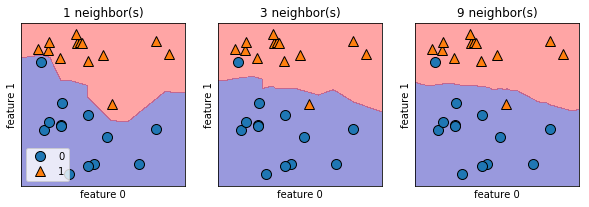

In [5]:
#This is a cool example of how to plot multiple graphs 
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
# the fit method returns the object self, so we can instantiate
# and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

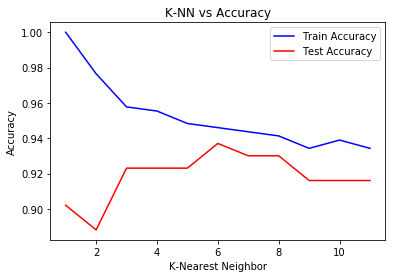

In [7]:
#Breast Cancer Data testing on multiple KNN models
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66) #stratify maintains the proportion of classes

k_list = np.arange(1,12,1)
train_accuracy = {}
test_accuracy = {}

for k in k_list:
    knn_clf = KNeighborsClassifier(k)
    knn_clf.fit(X_train,y_train)
    train_accuracy[k] = knn_clf.score(X_train,y_train) #training accuracy
    test_accuracy[k] = knn_clf.score(X_test,y_test) #test accuracy 
    

plt.plot(train_accuracy.keys(),train_accuracy.values(), 'b', label = 'Train Accuracy')
plt.plot(train_accuracy.keys(),test_accuracy.values(),'r', label = 'Test Accuracy')
plt.xlabel('K-Nearest Neighbor')
plt.ylabel('Accuracy')
plt.title('K-NN vs Accuracy')
plt.legend()
plt.show()

### K-Neighbors Regression
Regression Variant

When using multiple nearest neighbors - the prediction is the average of the nearest k neighbors

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples = 40)
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 0) #changing the random state drastically changes score
# X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 20)  #Run with this to see what happens to score 
reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train,y_train)
pred = reg.predict(X_test)

print("Predictions: {}".format(pred))

print("\nScore (R^2): {}".format(reg.score(X_test,y_test))) #R^2 score - coef of determination. 0 means just predicts mean as constant

Predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]

Score (R^2): 0.8344172446249604


From documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random

### Strengths, Weaknesses, and Parameters

Two important parameters: the number of neighbors, and how you measure distance between data points. By default - Euclidean distance is used.  k-NN is very easy to understand, however, it is important to preprocess your data. In practice, prediction can be slow, and lacks ability to handle many features.

## Linear Regression 